In [22]:
%matplotlib notebook

import numpy as np
import random
import matplotlib.pyplot as plt

In [81]:
def centerSample1():
    center = [random.random() for i in range(3)]
    return np.array(center)

def radiusSample1(radiusLimit=.2):
    return radiusLimit * random.random()

def makeSpheres(centerSampleFunction, radiusSampleFunction, numSphere):
    spheres = [(centerSampleFunction(), radiusSampleFunction()) for i in range(numSphere)]
    return spheres

def depthGet(sphereList, cameraPosition, polarAngle, azimuthalAngle, step, rayLimit):
    
    unitRayVector = np.array([np.cos(azimuthalAngle)*np.sin(polarAngle),
                              np.sin(azimuthalAngle)*np.sin(polarAngle),
                              np.cos(polarAngle)])
    
    for thisRadius in np.arange(0.0, rayLimit, step):
        thisRayPosition = cameraPosition + (thisRadius * unitRayVector)
        for thisSphere in sphereList:
            if np.sum((thisRayPosition - thisSphere[0])**2) <  thisSphere[1]**2:
                return np.linalg.norm(thisRayPosition)
    return rayLimit
            
def depthMapMake(sphereList, cameraPosition, rayAngleList, step=.001, rayLimit = 2):
    depthList = [depthGet(sphereList, cameraPosition, polarAngle, azimuthalAngle, step, rayLimit) 
                 for polarAngle, azimuthalAngle in rayAngleList]
    return depthList

In [82]:
sphereList = list(makeSpheres(centerSample1, radiusSample1, 10))
cameraPosition = np.array([0,0,0])
rayAngleList = [(azAngle, polarAngle) for azAngle in np.linspace(0,np.pi/2.,100) for polarAngle in np.linspace(0,np.pi/2.,100)]

depthMap = depthMapMake(sphereList, cameraPosition, rayAngleList)

<IPython.core.display.Javascript object>


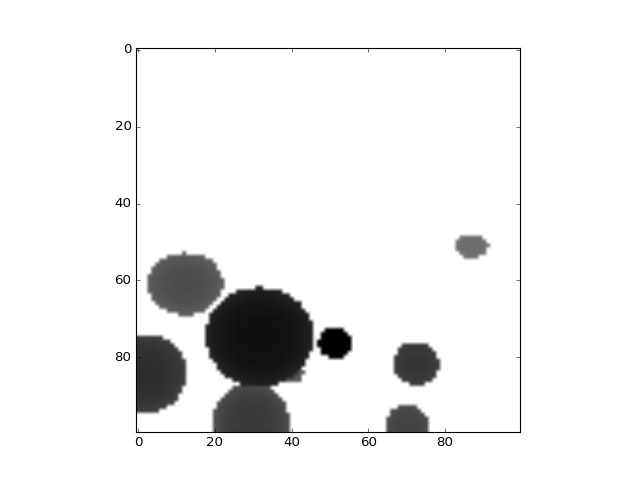

In [83]:
depthMapArray = np.array(depthMap).reshape((100,100))
plt.imshow(depthMapArray, cmap='gray')